In [66]:
# Importar librerías necesarias
import pandas as pd
from etl import ejecutar_etl
from config import connect_databases

# Ejecutar el proceso ETL
ejecutar_etl()

# Ahora cargamos las tablas de hechos y dimensiones para hacer las preguntas

# Conectar a la base de datos ETL
db_op, db_etl = connect_databases()


DimCliente cargado correctamente.
DimMensajero cargado correctamente.
DimSede cargado correctamente.
DimCiudad cargado correctamente.
DimFecha cargado correctamente.
FactEntregasPorDia cargado correctamente.
FactEntregasPorHora cargado correctamente.
FactEntregaEstados cargado correctamente.
FactNovedades cargado correctamente.
Proceso ETL completado.


## Cargar las tablas

In [113]:
import pandas as pd

# Cargar las tablas de hechos
F_novedades = pd.read_sql_table('FactNovedades', db_etl)
F_entregasPorDia = pd.read_sql_table('FactEntregasPorDia', db_etl)
F_entregasPorHora = pd.read_sql_table('FactEntregasPorHora', db_etl)
F_entregaEstados = pd.read_sql_table('FactEntregaEstados', db_etl)

In [114]:
# Cargar las tablas de Dimensiones

D_DimCiudad = pd.read_sql_table('DimCiudad', db_etl)
D_DimCliente = pd.read_sql_table('DimCliente', db_etl)
D_DimFecha = pd.read_sql_table('DimFecha', db_etl)
D_DimMensajero = pd.read_sql_table('DimMensajero', db_etl)
D_DimSede = pd.read_sql_table('DimSede', db_etl)

## 1) En qué meses del año los clientes solicitan más servicios de mensajería

+-----------+------------------+
|    mes    | numero_servicios |
+-----------+------------------+
|  October  |        5         |
| November  |        6         |
| September |        17        |
| December  |        23        |
|  January  |       272        |
| February  |       2232       |
|   March   |       3130       |
|   June    |       3998       |
|   April   |       4180       |
|  August   |       4184       |
|   July    |       4399       |
|    May    |       4506       |
+-----------+------------------+


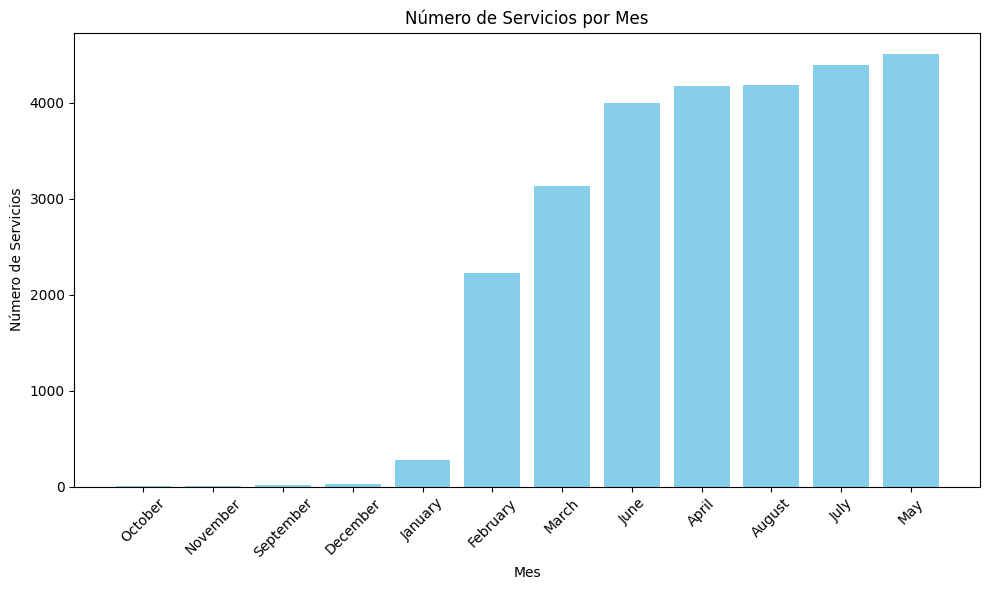

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
from config import connect_databases

# Conectar a las bases de datos
db_op, db_etl = connect_databases()

# Extraer los datos de la tabla mensajeria_servicio
query = "SELECT fecha_solicitud FROM public.mensajeria_servicio WHERE activo = true"
servicios = pd.read_sql_query(query, db_op)

# Convertir la columna 'fecha_solicitud' a datetime
servicios['fecha_solicitud'] = pd.to_datetime(servicios['fecha_solicitud'], errors='coerce')

# Extraer el mes de la fecha
servicios['mes'] = servicios['fecha_solicitud'].dt.month_name()

# Calcular la cantidad de servicios por mes
servicios_por_mes = servicios.groupby('mes').size().reset_index(name='numero_servicios')

# Ordenar los resultados de menor a mayor según el número de servicios
servicios_por_mes = servicios_por_mes.sort_values(by='numero_servicios', ascending=True)

# Mostrar la tabla con tabulado
print(tabulate(servicios_por_mes, headers='keys', tablefmt='pretty', showindex=False))

# Graficar la cantidad de servicios por mes
plt.figure(figsize=(10, 6))
plt.bar(servicios_por_mes['mes'], servicios_por_mes['numero_servicios'], color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Número de Servicios')
plt.title('Número de Servicios por Mes')
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()


## 2) Cuáles son los días donde más solicitudes hay.

+-----------+------------------+
|    dia    | numero_servicios |
+-----------+------------------+
|  Sunday   |       793        |
| Saturday  |       2327       |
|  Monday   |       4107       |
| Wednesday |       4687       |
| Thursday  |       4902       |
|  Friday   |       5010       |
|  Tuesday  |       5126       |
+-----------+------------------+


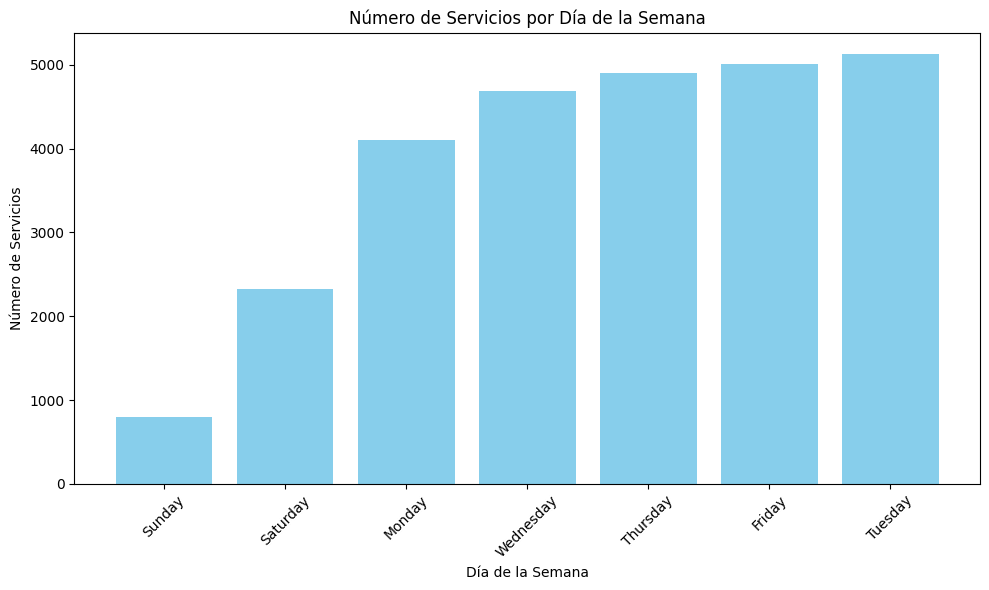

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
from config import connect_databases

# Conectar a las bases de datos
db_op, db_etl = connect_databases()

# Extraer los datos de la tabla mensajeria_servicio
query = "SELECT fecha_solicitud FROM public.mensajeria_servicio WHERE activo = true"
servicios = pd.read_sql_query(query, db_op)

# Convertir la columna 'fecha_solicitud' a datetime
servicios['fecha_solicitud'] = pd.to_datetime(servicios['fecha_solicitud'], errors='coerce')

# Extraer el día de la fecha_solicitud
servicios['dia'] = servicios['fecha_solicitud'].dt.day_name()

# Calcular la cantidad de servicios por día
servicios_por_dia = servicios.groupby('dia').size().reset_index(name='numero_servicios')

# Ordenar los resultados de menor a mayor según el número de servicios
servicios_por_dia = servicios_por_dia.sort_values(by='numero_servicios', ascending=True)

# Mostrar la tabla con tabulado
print(tabulate(servicios_por_dia, headers='keys', tablefmt='pretty', showindex=False))

# Graficar la cantidad de servicios por día
plt.figure(figsize=(10, 6))
plt.bar(servicios_por_dia['dia'], servicios_por_dia['numero_servicios'], color='skyblue')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Servicios')
plt.title('Número de Servicios por Día de la Semana')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


## 3) A qué hora los mensajeros están más ocupados.


1
+------+------------------+
| hora | numero_servicios |
+------+------------------+
|  0   |       137        |
|  1   |       156        |
|  2   |       147        |
|  3   |       102        |
|  4   |       100        |
|  5   |       130        |
|  6   |       876        |
|  7   |       1050       |
|  8   |       2614       |
|  9   |       3367       |
|  10  |       2925       |
|  11  |       3270       |
|  12  |       1743       |
|  13  |       1435       |
|  14  |       2527       |
|  15  |       2619       |
|  16  |       2100       |
|  17  |       1354       |
|  18  |       423        |
|  19  |       332        |
|  20  |       214        |
|  21  |       165        |
|  22  |       170        |
|  23  |       152        |
+------+------------------+


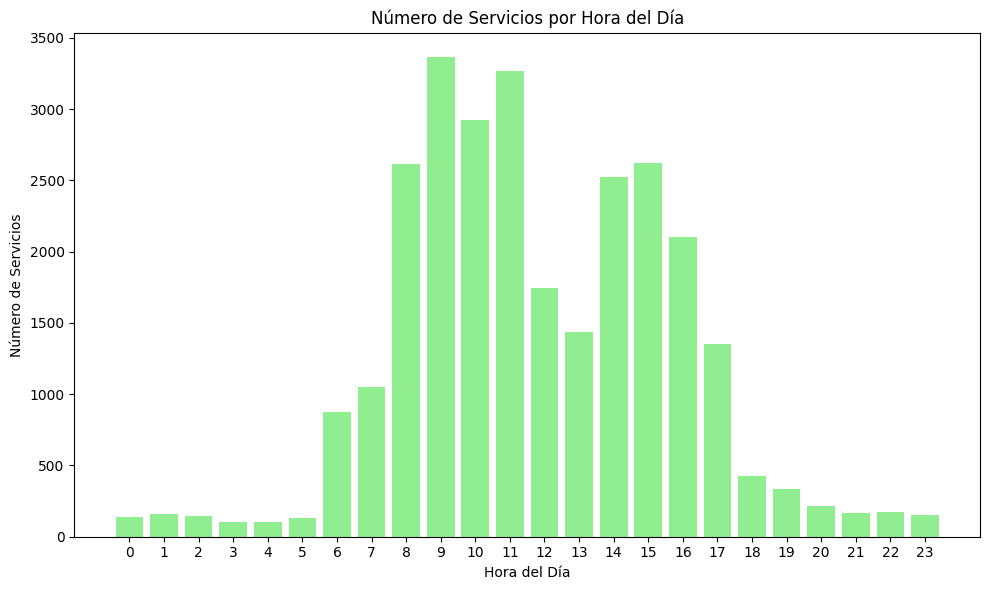

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
from config import connect_databases

# Extraer los datos de los estados de los servicios
query = """
    SELECT ms.id AS key_servicio, es_inicio.hora AS hora_iniciado
    FROM mensajeria_servicio ms
    LEFT JOIN mensajeria_estadosservicio es_inicio 
    ON ms.id = es_inicio.servicio_id AND es_inicio.estado_id = 1
    WHERE ms.activo = true
"""
db_op, db_etl = connect_databases()
inicios = pd.read_sql_query(query, db_op)

# Verificar si hay valores nulos en 'hora_iniciado'
print(inicios['hora_iniciado'].isnull().sum())

# Reemplazar los valores nulos con un valor de hora predeterminado (por ejemplo, 00:00)
inicios['hora_iniciado'] = inicios['hora_iniciado'].fillna('00:00:00')

# Convertir la columna 'hora_iniciado' a tipo timedelta
inicios['hora_iniciado'] = pd.to_timedelta(inicios['hora_iniciado'].astype(str), errors='coerce')

# Extraer la hora (0-23)
inicios['hora'] = inicios['hora_iniciado'].dt.seconds // 3600

# Calcular la cantidad de servicios por hora
servicios_por_hora = inicios.groupby('hora').size().reset_index(name='numero_servicios')

# Mostrar la tabla con tabulado
print(tabulate(servicios_por_hora, headers='keys', tablefmt='pretty', showindex=False))

# Graficar la cantidad de servicios por hora
plt.figure(figsize=(10, 6))
plt.bar(servicios_por_hora['hora'], servicios_por_hora['numero_servicios'], color='lightgreen')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Servicios')
plt.title('Número de Servicios por Hora del Día')
plt.xticks(range(24))  
plt.tight_layout()  
plt.show()


## 4) Número de servicios solicitados por cliente y por mes

+------------+-----------+------------------+
| cliente_id |    mes    | numero_servicios |
+------------+-----------+------------------+
|     2      |   April   |        2         |
|     2      |  August   |        1         |
|     2      | December  |        17        |
|     2      | February  |        9         |
|     2      |  January  |        22        |
|     2      |   July    |        1         |
|     2      |   June    |        2         |
|     2      |   March   |        3         |
|     2      |    May    |        2         |
|     2      | November  |        1         |
|     2      |  October  |        2         |
|     2      | September |        13        |
|     3      |   April   |        46        |
|     3      |  August   |        28        |
|     3      | February  |        16        |
|     3      |   July    |        21        |
|     3      |   June    |        22        |
|     3      |   March   |        42        |
|     3      |    May    |        

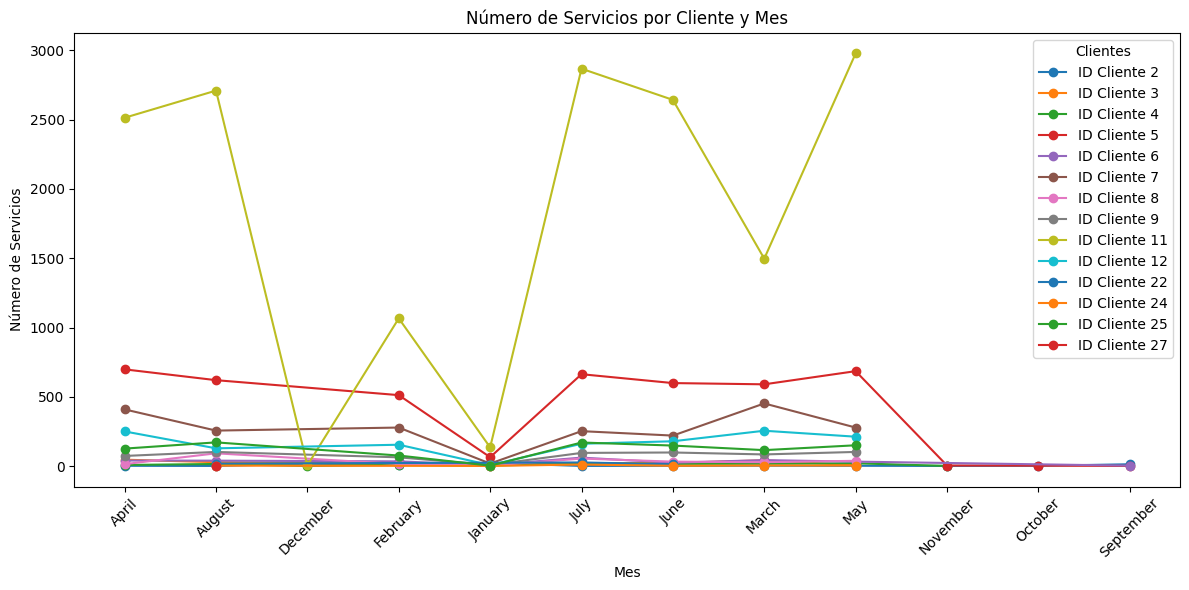

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
from config import connect_databases

# Conectar a la base de datos
db_op, db_etl = connect_databases()

# Extraer datos de la tabla clientes_usuarioaquitoy
query = """
    SELECT cu.cliente_id, ms.fecha_solicitud
    FROM mensajeria_servicio ms
    JOIN clientes_usuarioaquitoy cu ON ms.usuario_id = cu.id
    WHERE ms.activo = true
"""
servicios_cliente = pd.read_sql_query(query, db_op)

# Convertir la columna 'fecha_solicitud' a datetime
servicios_cliente['fecha_solicitud'] = pd.to_datetime(servicios_cliente['fecha_solicitud'], errors='coerce')

# Extraer el mes de la fecha
servicios_cliente['mes'] = servicios_cliente['fecha_solicitud'].dt.month_name()

# Calcular la cantidad de servicios por cliente y mes
servicios_por_cliente_mes = servicios_cliente.groupby(['cliente_id', 'mes']).size().reset_index(name='numero_servicios')

# Mostrar la tabla con tabulado
print(tabulate(servicios_por_cliente_mes, headers='keys', tablefmt='pretty', showindex=False))

# Graficar la cantidad de servicios por cliente y mes
plt.figure(figsize=(12, 6))
for cliente in servicios_por_cliente_mes['cliente_id'].unique():
    cliente_data = servicios_por_cliente_mes[servicios_por_cliente_mes['cliente_id'] == cliente]
    plt.plot(cliente_data['mes'], cliente_data['numero_servicios'], label=f'ID Cliente {cliente}', marker='o')

plt.xlabel('Mes')
plt.ylabel('Número de Servicios')
plt.title('Número de Servicios por Cliente y Mes')
plt.xticks(rotation=45)  
plt.legend(title='Clientes')
plt.tight_layout()  
plt.show()


## 5) Mensajeros más eficientes (Los que más servicios prestan)


+--------------+------------------+
| mensajero_id | numero_servicios |
+--------------+------------------+
|     30.0     |      2439.0      |
|     29.0     |      1553.0      |
|     15.0     |      1514.0      |
|     25.0     |      1456.0      |
|     31.0     |      1352.0      |
|     16.0     |      1333.0      |
|     41.0     |      1329.0      |
|     42.0     |      1254.0      |
|     22.0     |      1252.0      |
|     28.0     |      1228.0      |
|     11.0     |      1101.0      |
|     27.0     |      1068.0      |
|     8.0      |      1059.0      |
|     18.0     |      920.0       |
|     3.0      |      917.0       |
|     44.0     |      849.0       |
|     32.0     |      732.0       |
|     34.0     |      727.0       |
|     45.0     |      686.0       |
|     38.0     |      622.0       |
|     4.0      |      604.0       |
|     36.0     |      562.0       |
|     24.0     |      558.0       |
|     12.0     |      436.0       |
|     48.0     |      396.0 

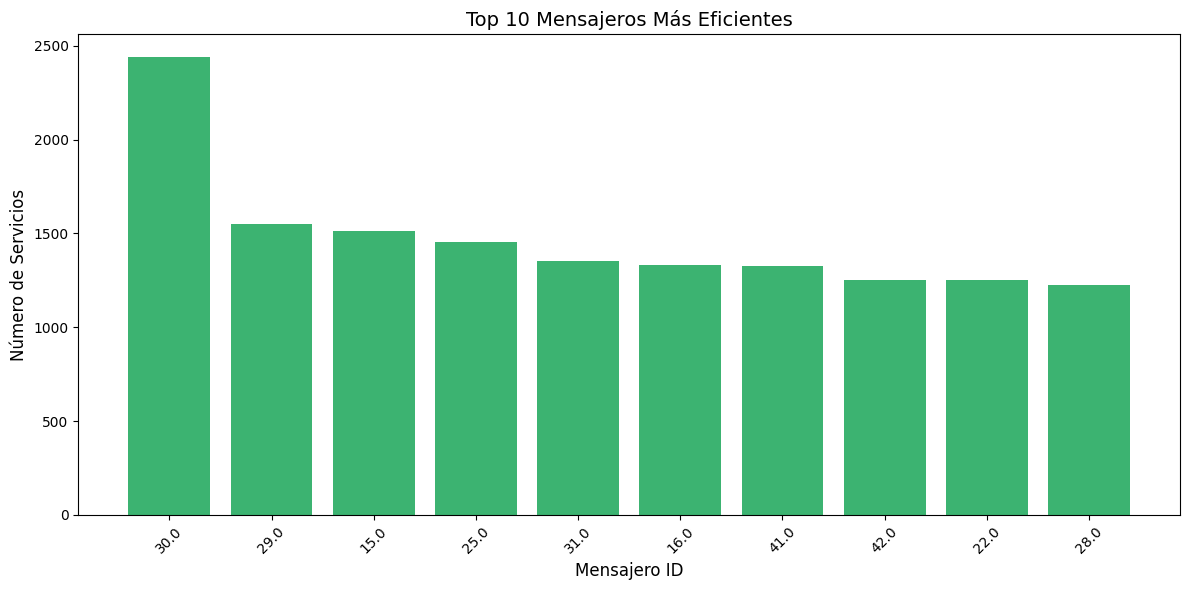

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Contar la cantidad de servicios realizados por cada mensajero
mensajeros_eficientes = F_entregaEstados.groupby('mensajero_id')['servicio_id'].count().reset_index()

# Renombrar las columnas para mayor claridad
mensajeros_eficientes.rename(columns={'servicio_id': 'numero_servicios'}, inplace=True)

# Ordenar por número de servicios en orden descendente
mensajeros_eficientes = mensajeros_eficientes.sort_values(by='numero_servicios', ascending=False)

# Mostrar los resultados en formato tabular
print(tabulate(mensajeros_eficientes, headers='keys', tablefmt='pretty', showindex=False))

# Visualizar los mensajeros más eficientes (top 10)
plt.figure(figsize=(12, 6))
plt.bar(
    mensajeros_eficientes['mensajero_id'].head(10).astype(str),
    mensajeros_eficientes['numero_servicios'].head(10),
    color='mediumseagreen'
)
plt.xlabel('Mensajero ID', fontsize=12)
plt.ylabel('Número de Servicios', fontsize=12)
plt.title('Top 10 Mensajeros Más Eficientes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## 6) Cuáles son las sedes que más servicios solicitan por cada cliente.

+------------+-----------------------------------------+---------+----------------------------------+-----------------+
| id_cliente |             nombre_cliente              | id_sede |           nombre_sede            | total_servicios |
+------------+-----------------------------------------+---------+----------------------------------+-----------------+
|     11     |      CARROS DEL  PACIFICO (CHINA)       |   24    |         PASTO VITRINA /          |      2508       |
|     11     |      CARROS DEL  PACIFICO (CHINA)       |   25    |         PASTO BODEGA 29/         |      2287       |
|     11     |      CARROS DEL  PACIFICO (CHINA)       |   26    |       PALMIRA BODEGA 20  /       |      1841       |
|     4      |             CRUZ AZUL-LIFE              |   13    |         DIME / LOS ROJOS         |      1054       |
|     10     |          CLINICA VIDA Y SALUD           |   28    |      CONTRIBUTIVO / ESENSA       |       925       |
|     11     |      CARROS DEL  PACIFICO

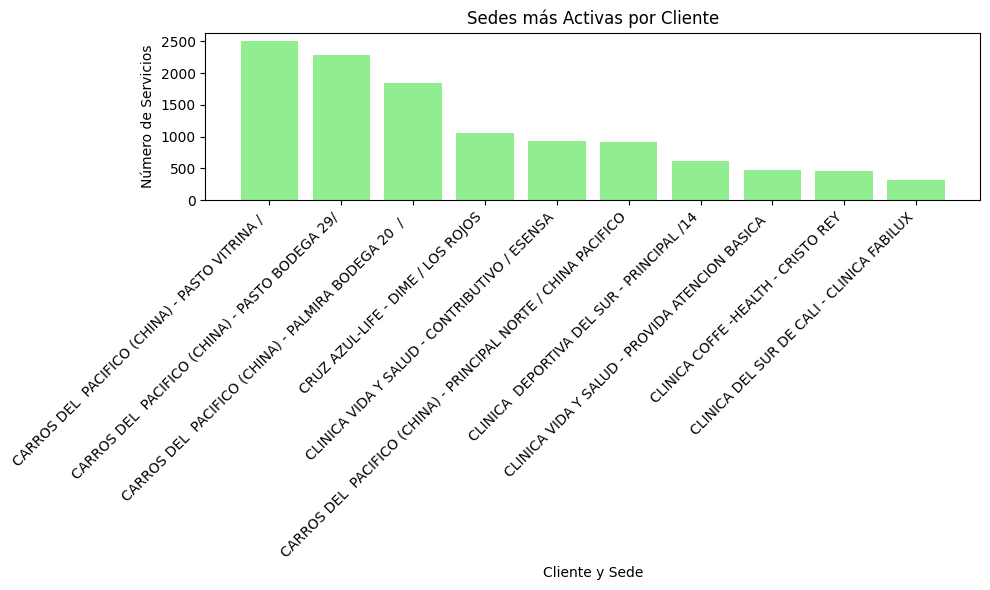

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
from config import connect_databases

# Conectar a las bases de datos
db_op, db_etl = connect_databases()

# Consulta SQL para obtener las sedes más activas por cliente
query = """
    SELECT
        cl.cliente_id AS id_cliente,
        cl.nombre AS nombre_cliente,
        sd.sede_id AS id_sede,
        sd.nombre AS nombre_sede,
        COUNT(ms.id) AS total_servicios
    FROM
        mensajeria_servicio ms
    JOIN
        sede sd ON ms.origen_id = sd.sede_id
    JOIN
        cliente cl ON sd.cliente_id = cl.cliente_id
    WHERE
        ms.activo = true
    GROUP BY
        cl.cliente_id, cl.nombre, sd.sede_id, sd.nombre
    ORDER BY
        total_servicios DESC, cl.nombre, sd.nombre;
"""

# Ejecutar la consulta
sedes_mas_activas = pd.read_sql_query(query, db_op)

# Asegúrate de que 'total_servicios' es de tipo numérico
sedes_mas_activas['total_servicios'] = pd.to_numeric(sedes_mas_activas['total_servicios'], errors='coerce')

# Agrupar por id_cliente y sede, y contar los servicios únicos si es necesario
sedes_mas_activas_agrupadas = sedes_mas_activas.groupby(
    ['id_cliente', 'nombre_cliente', 'id_sede', 'nombre_sede']
).agg(
    total_servicios=('total_servicios', 'sum')  # Sumar los servicios si hay duplicados
).reset_index()

# Asegurarse de que 'total_servicios' es numérico
sedes_mas_activas_agrupadas['total_servicios'] = pd.to_numeric(sedes_mas_activas_agrupadas['total_servicios'], errors='coerce')

# Ordenar los resultados de forma descendente por 'total_servicios' y 'id_cliente'
sedes_mas_activas_agrupadas = sedes_mas_activas_agrupadas.sort_values(
    by=['total_servicios', 'id_cliente'], ascending=[False, True]
)

print(tabulate(sedes_mas_activas_agrupadas, headers='keys', tablefmt='pretty', showindex=False))

# Graficar los resultados
plt.figure(figsize=(10, 6))

sedes_mas_activas_agrupadas['etiqueta'] = sedes_mas_activas_agrupadas['nombre_cliente'] + ' - ' + sedes_mas_activas_agrupadas['nombre_sede']

max_labels = 10  # Ajustar las sedes
sedes_mas_activas_agrupadas = sedes_mas_activas_agrupadas.head(max_labels)

# Crear el gráfico de barras
plt.bar(sedes_mas_activas_agrupadas['etiqueta'], sedes_mas_activas_agrupadas['total_servicios'], color='lightgreen')

plt.xlabel('Cliente y Sede')
plt.ylabel('Número de Servicios')
plt.title('Sedes más Activas por Cliente')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Mostrar el gráfico
plt.show()


## 7) Cuál es el tiempo promedio de entrega desde que se solicita el servicio hasta que se cierra el caso. 

In [125]:
import pandas as pd

# Función para convertir timedelta a minutos totales
def timedelta_to_minutes(td):
    if pd.isnull(td):  # Manejar valores NaT
        return None
    try:
        return td.days * 24 * 60 + td.seconds / 60  # Convertir días y segundos a minutos
    except AttributeError:
        return None

# Convertir las columnas de tiempo (si están en formato cadena) a timedelta
F_entregaEstados['tiempo_iniciado_asignado'] = pd.to_timedelta(F_entregaEstados['tiempo_iniciado_asignado'], errors='coerce')
F_entregaEstados['tiempo_asignado_recogido'] = pd.to_timedelta(F_entregaEstados['tiempo_asignado_recogido'], errors='coerce')
F_entregaEstados['tiempo_recogido_entregado'] = pd.to_timedelta(F_entregaEstados['tiempo_recogido_entregado'], errors='coerce')
F_entregaEstados['tiempo_entregado_finalizado'] = pd.to_timedelta(F_entregaEstados['tiempo_entregado_finalizado'], errors='coerce')

# Convertir las columnas de tiempo a minutos totales
F_entregaEstados['tiempo_iniciado_asignado_min'] = F_entregaEstados['tiempo_iniciado_asignado'].apply(timedelta_to_minutes)
F_entregaEstados['tiempo_asignado_recogido_min'] = F_entregaEstados['tiempo_asignado_recogido'].apply(timedelta_to_minutes)
F_entregaEstados['tiempo_recogido_entregado_min'] = F_entregaEstados['tiempo_recogido_entregado'].apply(timedelta_to_minutes)
F_entregaEstados['tiempo_entregado_finalizado_min'] = F_entregaEstados['tiempo_entregado_finalizado'].apply(timedelta_to_minutes)

# Calcular el tiempo total desde iniciado hasta finalizado
F_entregaEstados['tiempo_total_min'] = (
    F_entregaEstados['tiempo_iniciado_asignado_min'] +
    F_entregaEstados['tiempo_asignado_recogido_min'] +
    F_entregaEstados['tiempo_recogido_entregado_min'] +
    F_entregaEstados['tiempo_entregado_finalizado_min']
)

# Mostrar los resultados intermedios
#print(F_entregaEstados[['tiempo_iniciado_asignado_min', 'tiempo_total_min']].head(10))

# Filtrar filas válidas (tiempo total no nulo)
F_entregaEstados_validos = F_entregaEstados.dropna(subset=['tiempo_total_min'])

# Calcular el promedio del tiempo total
if not F_entregaEstados_validos.empty:
    tiempo_promedio_total = F_entregaEstados_validos['tiempo_total_min'].mean()
    print(f"Tiempo promedio desde inicio hasta finalización: {tiempo_promedio_total:.2f} minutos")
else:
    print("No hay datos válidos para calcular el tiempo promedio.")


Tiempo promedio desde inicio hasta finalización: 758.34 minutos


## 8) Mostrar los tiempos de espera por cada fase del servicio: Iniciado, Con mensajero asignado, recogido en origen, Entregado en Destino, Cerrado. En que fase del servicio hay más demoras?

Promedios de tiempos de espera por fase (en minutos):
Tiempo promedio de espera en la fase 'Iniciado a Asignado': 149.05 minutos
Tiempo promedio de espera en la fase 'Asignado a Recogido': 107.88 minutos
Tiempo promedio de espera en la fase 'Recogido a Entregado': 107.93 minutos
Tiempo promedio de espera en la fase 'Entregado a Finalizado': 294.56 minutos

La fase con mayor demora es: 'Entregado a Finalizado'


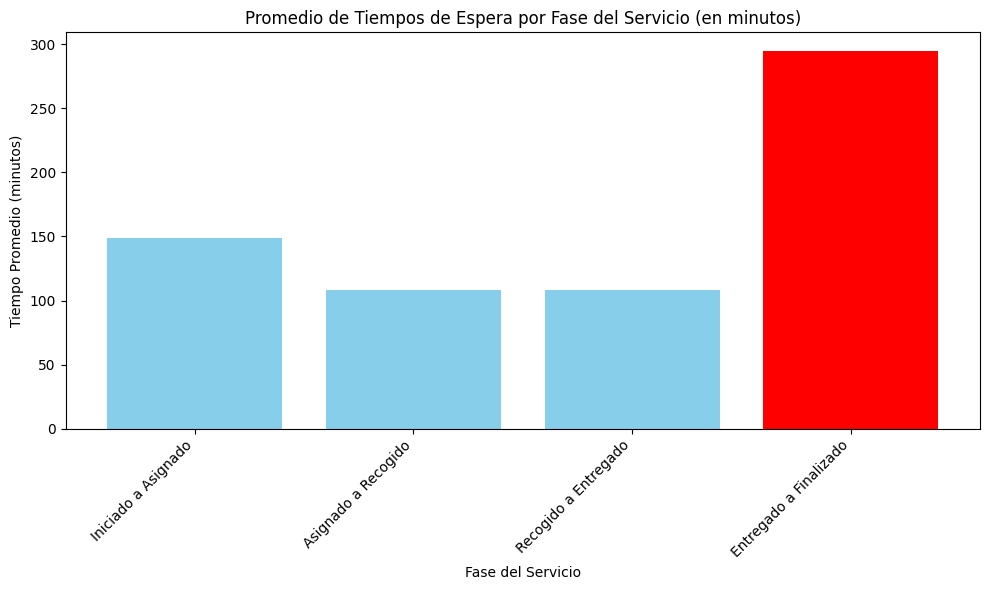

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurémonos de que las columnas de tiempo estén en formato timedelta
F_entregaEstados['tiempo_iniciado_asignado'] = pd.to_timedelta(F_entregaEstados['tiempo_iniciado_asignado'], errors='coerce')
F_entregaEstados['tiempo_asignado_recogido'] = pd.to_timedelta(F_entregaEstados['tiempo_asignado_recogido'], errors='coerce')
F_entregaEstados['tiempo_recogido_entregado'] = pd.to_timedelta(F_entregaEstados['tiempo_recogido_entregado'], errors='coerce')
F_entregaEstados['tiempo_entregado_finalizado'] = pd.to_timedelta(F_entregaEstados['tiempo_entregado_finalizado'], errors='coerce')

# Convertir los tiempos a minutos para facilitar el análisis
F_entregaEstados['tiempo_iniciado_asignado_min'] = F_entregaEstados['tiempo_iniciado_asignado'].dt.total_seconds() / 60
F_entregaEstados['tiempo_asignado_recogido_min'] = F_entregaEstados['tiempo_asignado_recogido'].dt.total_seconds() / 60
F_entregaEstados['tiempo_recogido_entregado_min'] = F_entregaEstados['tiempo_recogido_entregado'].dt.total_seconds() / 60
F_entregaEstados['tiempo_entregado_finalizado_min'] = F_entregaEstados['tiempo_entregado_finalizado'].dt.total_seconds() / 60

# Calcular el promedio de tiempo para cada fase
promedios_fases = {
    'Iniciado a Asignado': F_entregaEstados['tiempo_iniciado_asignado_min'].mean(),
    'Asignado a Recogido': F_entregaEstados['tiempo_asignado_recogido_min'].mean(),
    'Recogido a Entregado': F_entregaEstados['tiempo_recogido_entregado_min'].mean(),
    'Entregado a Finalizado': F_entregaEstados['tiempo_entregado_finalizado_min'].mean()
}

# Mostrar los promedios de los tiempos
print("Promedios de tiempos de espera por fase (en minutos):")
for fase, tiempo in promedios_fases.items():
    print(f"Tiempo promedio de espera en la fase '{fase}': {tiempo:.2f} minutos")

# Identificar la fase con mayor demora
fase_mayor_demora = max(promedios_fases, key=promedios_fases.get)
print(f"\nLa fase con mayor demora es: '{fase_mayor_demora}'")

# Definir colores: resaltar la fase con más demora en un color distinto
colores = ['skyblue' if fase != fase_mayor_demora else 'red' for fase in promedios_fases.keys()]

# Graficar los tiempos promedio por fase
plt.figure(figsize=(10, 6))
plt.bar(promedios_fases.keys(), promedios_fases.values(), color=colores)

# Personalizar el gráfico
plt.title("Promedio de Tiempos de Espera por Fase del Servicio (en minutos)")
plt.xlabel("Fase del Servicio")
plt.ylabel("Tiempo Promedio (minutos)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## 9) Cuáles son las novedades que más se presentan durante la prestación del servicio?

Las novedades más frecuentes durante la prestación del servicio son:
+------------------------+----------+
|    Tipo de Novedad     | Cantidad |
+------------------------+----------+
| Novedades del servicio |   3892   |
|   No puedo continuar   |   1316   |
+------------------------+----------+


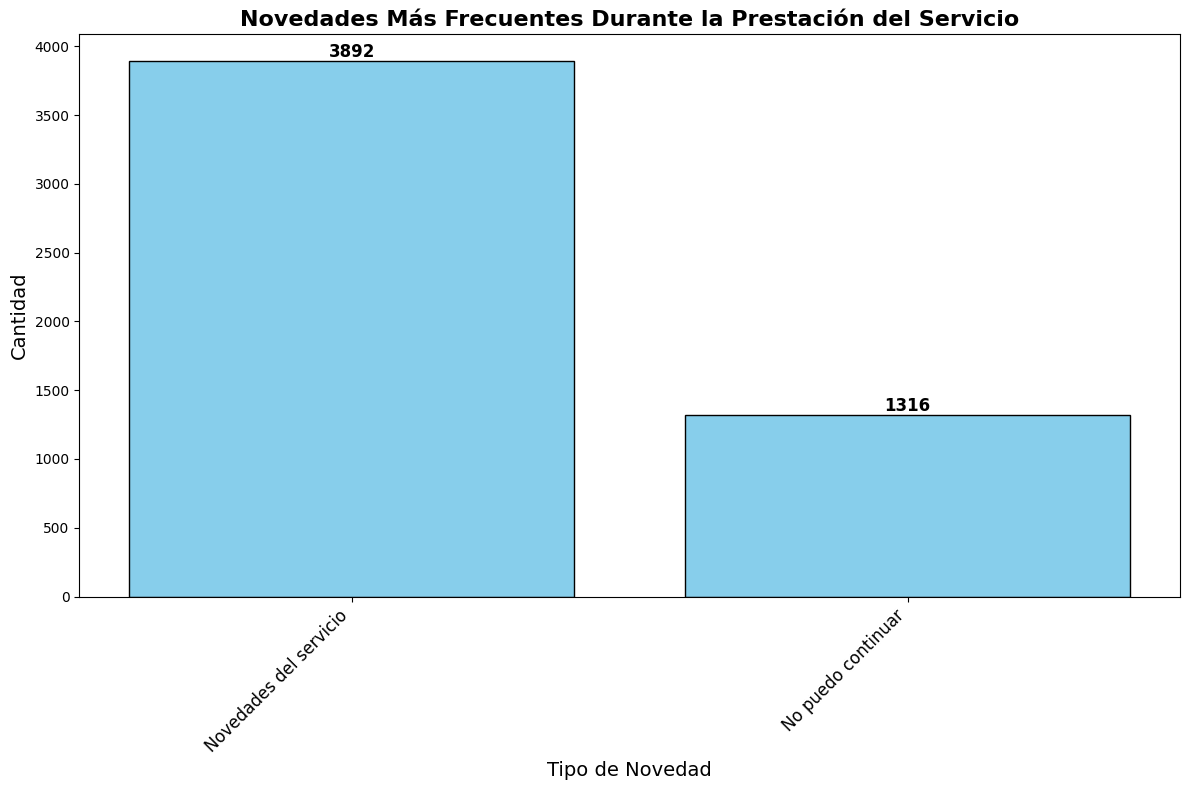

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar las novedades
novedades_frecuentes = F_novedades['tipo_novedad'].value_counts()

# Renombrar la serie para mayor claridad
novedades_frecuentes = novedades_frecuentes.reset_index()
novedades_frecuentes.columns = ['Tipo de Novedad', 'Cantidad']

# Mostrar las novedades más frecuentes
print("Las novedades más frecuentes durante la prestación del servicio son:")
print(tabulate(novedades_frecuentes, headers='keys', tablefmt='pretty', showindex=False))

plt.figure(figsize=(12, 8))  

# Crear un gráfico de barras 
bars = plt.bar(novedades_frecuentes['Tipo de Novedad'], novedades_frecuentes['Cantidad'], color='skyblue', edgecolor='black')

# Añadir etiquetas y título
plt.title('Novedades Más Frecuentes Durante la Prestación del Servicio', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Novedad', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, str(int(yval)), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()

# Mostrar el gráfico
plt.show()
